In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import tree

## Display Training & Test data (top & bottom five datasets)

In [4]:
#load the csv file
train_data = pd.read_csv('train_data_preprocessed_v2.csv')
test_data = pd.read_csv('test_data_preprocessed_v2.csv')

In [5]:
train_data.shape

(36168, 48)

In [6]:
test_data.shape

(9043, 48)

In [7]:
train_data.head()

,age,day,housing_no,housing_yes,loan_no,loan_yes,marital_divorced,marital_married,marital_single,default_no,...,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,42,29,0,1,0,1,1,0,0,1,...,0,0,1,0,-0.645275,-0.454071,-1.728912,4.961712,-0.420772,0
1,50,15,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.538652,-0.454071,0.762074,-0.173538,-0.420772,0
2,47,5,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.369329,-0.454071,-0.972209,2.939376,-0.420772,0
3,39,16,0,1,1,0,1,0,0,1,...,0,0,1,0,-0.077591,-0.454071,-1.019112,-0.802554,-0.420772,0
4,30,30,1,0,1,0,0,0,1,1,...,0,0,1,0,-0.393144,-0.454071,0.429922,-0.173538,-0.420772,1


In [8]:
test_data.head()

,age,day,housing_no,housing_yes,loan_no,loan_yes,marital_divorced,marital_married,marital_single,default_no,...,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,48,14,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.353943,-0.464901,0.033731,-0.811596,-0.435061,0
1,31,22,1,0,1,0,0,0,1,1,...,0,0,1,0,3.367438,-0.464901,-0.425208,-0.170094,-0.435061,0
2,45,9,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.112356,-0.464901,-0.002151,-0.811596,-0.435061,0
3,58,20,1,0,1,0,0,1,0,1,...,0,0,1,0,0.064959,-0.464901,-1.512344,0.322148,-0.435061,0
4,35,21,1,0,1,0,0,0,1,1,...,0,0,1,0,1.839344,-0.464901,2.413680,-0.170094,-0.435061,1


In [9]:
# Creating X,Y test and train data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

### Creating individual base classifiers

In [10]:
random_forest = RandomForestClassifier(n_estimators=25, random_state=1)
logistic_regression = LogisticRegression(C = 0.1, max_iter = 200, penalty = 'l1', solver = 'liblinear')
neural = MLPClassifier(max_iter=1000, random_state=42, alpha = 0.001, hidden_layer_sizes = (100,100))
naive_bayes = GaussianNB()
DT = tree.DecisionTreeClassifier(max_depth = 6)

## 1. Ensemble Method - Gradient Boosting for Classification
#### Gradient Boosting is a powerful ensemble machine learning technique used for both classification and regression tasks. It is a sequential, additive modeling technique that builds an ensemble of weak learners (usually decision trees) to create a strong predictive model. Gradient Boosting is known for its high predictive accuracy and flexibility.

In [11]:
clf = GradientBoostingClassifier().fit(x_train, y_train)
print ('Testing accuracy: ',clf.score(x_test, y_test))

Testing accuracy:  0.9052305650779608


### Hyperparameter Tunning for GradientBoostingClassifier

In [12]:
model = GradientBoostingClassifier(random_state=42)
# Define a smaller search space for hyperparameters
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01],
    'max_depth': [4,5,6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Use RandomizedSearchCV to search through a subset of the hyperparameter space
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10,
                                   scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Fit the randomized search to your data
random_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy:.2f}')

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

Best Model Accuracy: 0.90
Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}


### Training Performance

In [13]:
model = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_depth = 5, learning_rate = 0.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [14]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.90 0.90 0.90 0.90 0.90 0.90 0.90 0.90 0.91 0.90]
Ten-fold Cross Validation Score= 0.9014


### Testing Performance

Testing Accuracy: 0.9001437576025655
Confusion Matrix:
 [[7841  144]
 [ 759  299]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.67      0.28      0.40      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



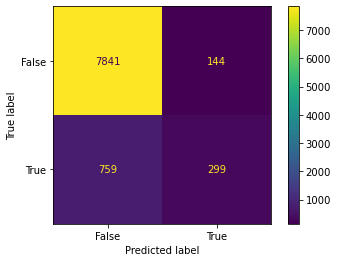

In [15]:
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## 2. Ensemble Method - AdaBoost
### AdaBoost (Adaptive Boosting) is an ensemble learning technique that combines multiple weak classifiers to create a strong classifier. 

### Model Performance

Training accuracy: 0.886 (+/- 0.0054) Testing accuracy: 0.886 [Decision Tree]
Confusion Matrix:
 [[7598  387]
 [ 640  418]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      7985
           1       0.52      0.40      0.45      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.67      0.69      9043
weighted avg       0.88      0.89      0.88      9043



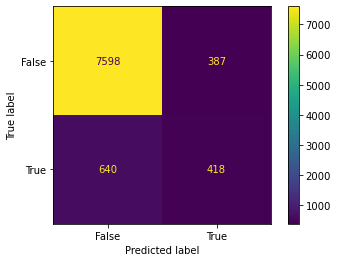

Training accuracy: 0.897 (+/- 0.0035) Testing accuracy: 0.902 [random_forest]
Confusion Matrix:
 [[7822  163]
 [ 727  331]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.67      0.31      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043



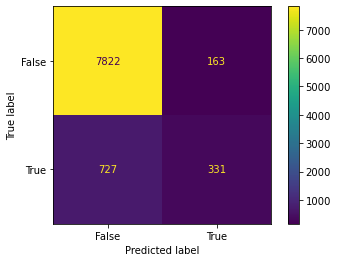

Training accuracy: 0.647 (+/- 0.2051) Testing accuracy: 0.123 [Naive_Bayes]
Confusion Matrix:
 [[  66 7919]
 [  14 1044]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.01      0.02      7985
           1       0.12      0.99      0.21      1058

    accuracy                           0.12      9043
   macro avg       0.47      0.50      0.11      9043
weighted avg       0.74      0.12      0.04      9043



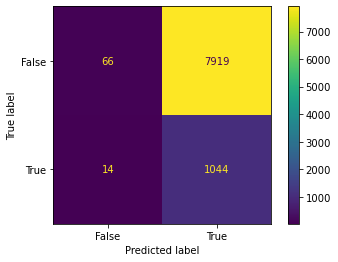

In [16]:
for clf, label in zip([DT, random_forest, naive_bayes], ['Decision Tree','random_forest', 'Naive_Bayes']):
    adaboost_classifier = AdaBoostClassifier(clf,algorithm='SAMME.R')
    adaboost_classifier.fit(x_train, y_train)
    y_pred = adaboost_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores = cross_val_score(adaboost_classifier, x_test, y_test,error_score='raise', scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) Testing accuracy: %0.3f [%s]" % (scores.mean(), scores.std(),accuracy, label))
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print("Confusion Matrix:\n", confusion_matrix)
    print("Classification Report:\n", classification_rep)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

## 3. Ensemble Method - Hard voting classifier

In [17]:
# Soft voting classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('logistic_regression', logistic_regression),
    ('Neural_Network',neural )
], voting='hard')

In [18]:
ensemble_classifier = ensemble_classifier.fit(x_train, y_train)

### Model Performance

In [19]:
for clf, label in zip([random_forest, logistic_regression, neural, ensemble_classifier], ['random_forest', 'logistic_regression', 'Neural_Network', 'ensemble_classifier']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(),label))
y_pred = ensemble_classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Testing accuracy: %0.3f [Ensemble Classifier]'% accuracy)

Training accuracy: 0.903 (+/- 0.0046) [random_forest]
Training accuracy: 0.902 (+/- 0.0033) [logistic_regression]
Training accuracy: 0.885 (+/- 0.0065) [Neural_Network]
Training accuracy: 0.905 (+/- 0.0040) [ensemble_classifier]
Testing accuracy: 0.904 [Ensemble Classifier]


In [20]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(ensemble_classifier, x_train, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.90 0.90 0.91 0.91 0.90 0.90 0.91 0.90 0.91 0.90]
Ten-fold Cross Validation Score= 0.9047


Testing Accuracy: 0.9041247373659184
Confusion Matrix:
 [[7766  219]
 [ 648  410]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



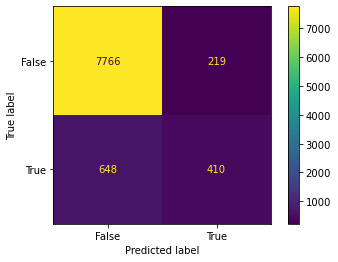

In [21]:
accuracy = accuracy_score(y_test, y_pred)
confusion = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])
cm_display.plot()
plt.show()